In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas_profiling   
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

C:\Users\Sony\Anaconda4\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Sony\Anaconda4\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Sony\Anaconda4\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Sony\Anaconda4\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Sony\Anaconda4\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Sony\Anaconda4\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\Sony\Anac

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [3]:
credit = pd.read_excel('C:\\Users\\Sony\\Downloads\\BA classes\\class 20 - final assign\\3. CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION\\CREDIT CARD USERS DATA.xlsx')
credit.head()

,custid,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,...,multline,voice,pager,internet,callid,ebill,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,15,3,1,1,...,1,1,1,0,0,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,17,4,2,0,...,1,1,1,4,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,14,2,2,0,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,16,3,2,0,...,1,0,0,2,0,1,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,16,3,2,0,...,0,1,0,3,1,0,0,0,1,0


In [4]:
credit.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'ed',
       'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income',
       'lninc', 'inccat', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt',
       'lnothdebt', 'default', 'jobsat', 'marital', 'spoused', 'reside',
       'pets', 'homeown', 'hometype', 'address', 'addresscat', 'cars',
       'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy',
       'commute', 'commutecat', 'commutetime', 'telecommute', 'reason',
       'polview', 'polparty', 'polcontrib', 'vote', 'cardspent', 'card2spent',
       'tenure', 'churn', 'longmon', 'lnlongmon', 'longten', 'lnlongten',
       'tollfree', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equip',
       'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'callcard',
       'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wireless', 'wiremon',
       'lnwiremon', 'wireten', 'lnwireten', 'multline', 'voice', 'pager',
       'internet', 'callid', 'ebi

In [3]:
# Since all the Log variables have zero, we need to recalculate the log variables by taking log(x+1), where x is the original variables
credit['lninc'] = np.log(credit['income']+1)
credit['lncreddebt'] = np.log(credit['creddebt']+1)
credit['lnothdeb'] = np.log(credit['othdebt']+1)
credit['lnlongmon'] = np.log(credit['longmon']+1)
credit['lnlongten'] = np.log(credit['longten']+1)
credit['lntollmon'] = np.log(credit['tollmon']+1)
credit['lntollten'] = np.log(credit['tollten']+1)
credit['lnequipmon'] = np.log(credit['equipmon']+1)
credit['lnequipten'] = np.log(credit['equipten']+1)
credit['lncardmon'] = np.log(credit['cardmon']+1)
credit['lncardten'] = np.log(credit['cardten']+1)
credit['lnwiremon'] = np.log(credit['wiremon']+1)
credit['lnwireten'] = np.log(credit['wireten']+1)

In [30]:
credit.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'ed',
       'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income',
       'lninc', 'inccat', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt',
       'lnothdebt', 'default', 'jobsat', 'marital', 'spoused', 'reside',
       'pets', 'homeown', 'hometype', 'address', 'addresscat', 'cars',
       'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy',
       'commute', 'commutecat', 'commutetime', 'telecommute', 'reason',
       'polview', 'polparty', 'polcontrib', 'vote', 'cardspent', 'card2spent',
       'tenure', 'churn', 'longmon', 'lnlongmon', 'longten', 'lnlongten',
       'tollfree', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equip',
       'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'callcard',
       'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wireless', 'wiremon',
       'lnwiremon', 'wireten', 'lnwireten', 'multline', 'voice', 'pager',
       'internet', 'callid', 'ebi

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


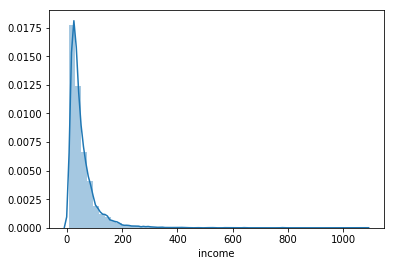

In [34]:
#Since we have got the original and its log variable, we need to check which variable performs better.so we need to create some 
# distplots to see the distribution of the data and test which var is better ln var or normal var
import seaborn as sb
sb.distplot(credit.income)


C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


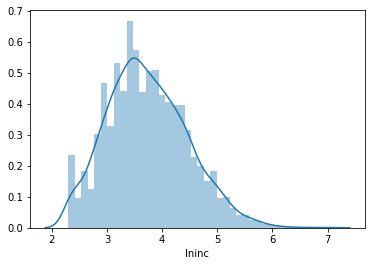

In [33]:
sb.distplot(credit.lninc)

#### Both income and lninc show similarity so we can use any one of them

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


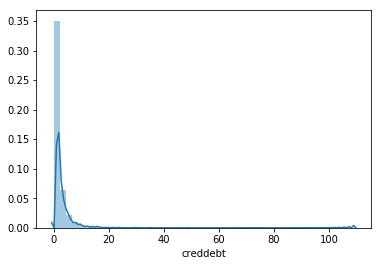

In [36]:
sb.distplot(credit.creddebt)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


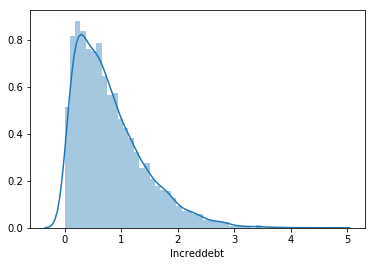

In [37]:
sb.distplot(credit.lncreddebt)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


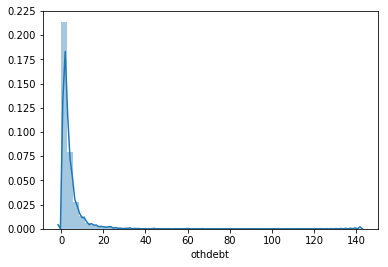

In [73]:
sb.distplot(credit.othdebt)
credit['lnothdeb'] = np.log(credit['othdebt']+1)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


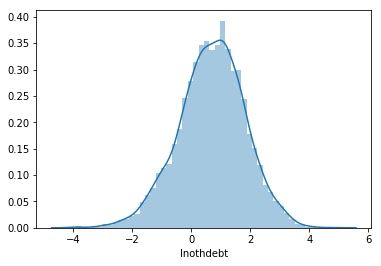

In [75]:
credit['lnothdebt'] = credit['lnothdebt'].fillna(credit['lnothdebt'].mean())
sb.distplot(credit.lnothdebt)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


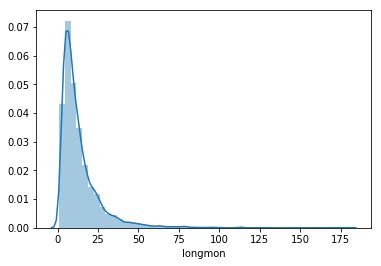

In [45]:
sb.distplot(credit.longmon)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


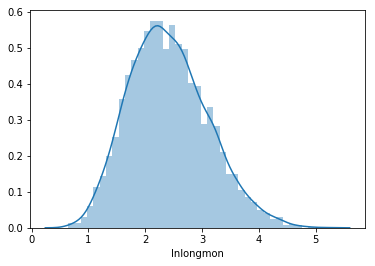

In [46]:
sb.distplot(credit.lnlongmon)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


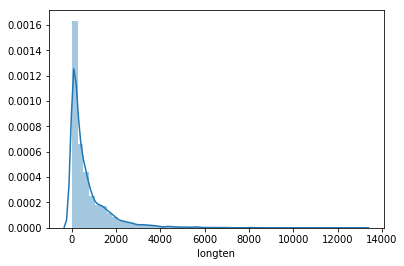

In [76]:
credit['longten'] = credit['longten'].fillna(credit['longten'].mean())
sb.distplot(abs(credit.longten))

In [72]:
credit.lnothdebt.isnull().any()

True

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


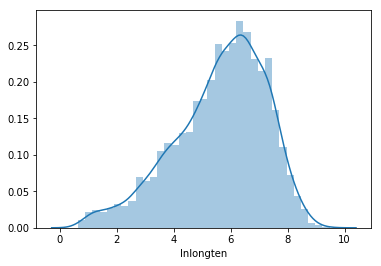

In [77]:
credit['lnlongten'] = credit['lnlongten'].fillna(credit['lnlongten'].mean())
sb.distplot(credit.lnlongten)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


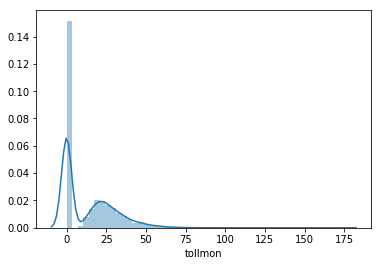

In [49]:
sb.distplot(credit.tollmon)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


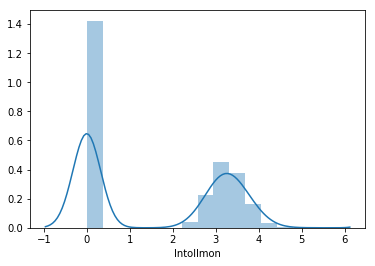

In [50]:
sb.distplot(credit.lntollmon)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


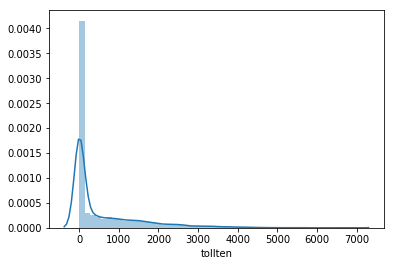

In [51]:
sb.distplot(credit.tollten)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


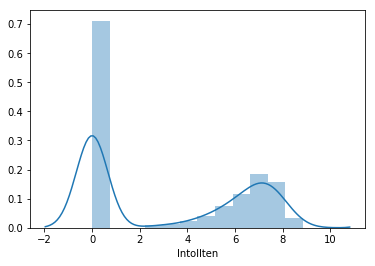

In [52]:
sb.distplot(credit.lntollten)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


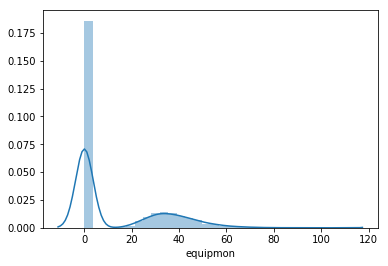

In [53]:
sb.distplot(credit.equipmon)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


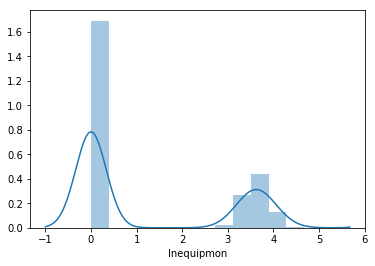

In [54]:
sb.distplot(credit.lnequipmon)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


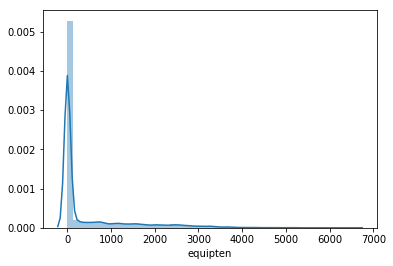

In [55]:
sb.distplot(credit.equipten)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


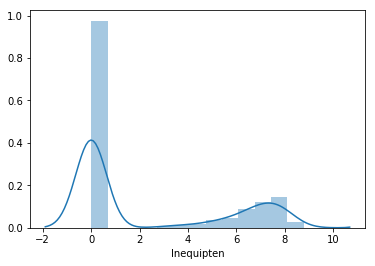

In [56]:
sb.distplot(credit.lnequipten)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


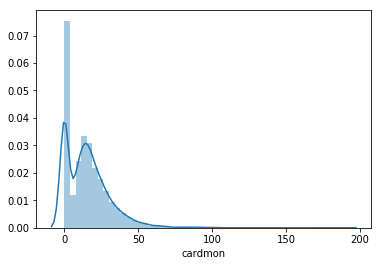

In [57]:
sb.distplot(credit.cardmon)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


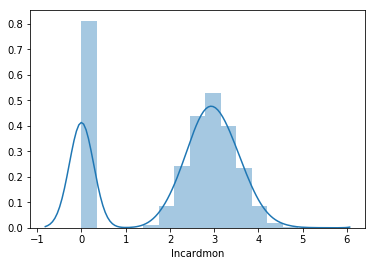

In [58]:
sb.distplot(credit.lncardmon)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


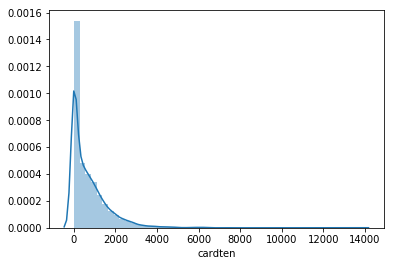

In [79]:
credit['cardten'] = credit['cardten'].fillna(credit['cardten'].mean())
sb.distplot(credit.cardten)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


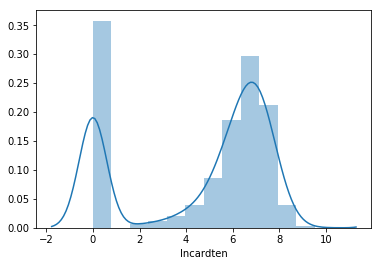

In [81]:
credit['lncardten'] = credit['lncardten'].fillna(credit['lncardten'].mean())
sb.distplot(credit.lncardten)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


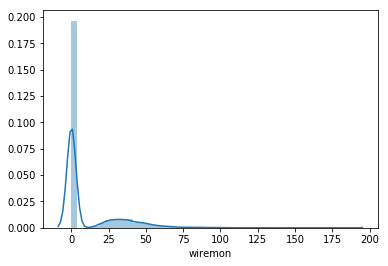

In [61]:
sb.distplot(credit.wiremon)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


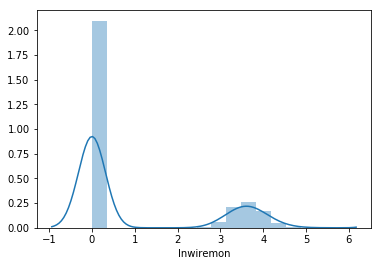

In [62]:
sb.distplot(credit.lnwiremon)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


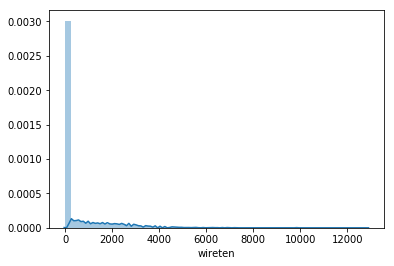

In [63]:
sb.distplot(credit.wireten)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


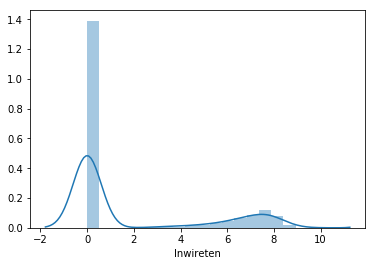

In [64]:
sb.distplot(credit.lnwireten)

In [5]:
# From the above data, we understand that the log vars perform well compared to original vars. so we eliminate actual vars.
# we also found out by data screening that data contains some useless variables. so we drop them.
credit.drop(credit[['custid','income','othdebt','creddebt','longmon','longten','tollmon','tollten','polview','polparty','polcontrib','vote','equipmon','equipten','cardmon','cardten','wiremon','wireten']],axis = 1,inplace = True)

In [5]:
credit.shape

(5000, 68)

In [6]:
#to get the total spent of two card ,we combine the spent on two cards which would be our Dependent variable
credit['total_card_spent'] = credit.cardspent + credit.card2spent

In [7]:
credit.head(2)

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,pager,internet,callid,ebill,news,response_01,response_02,response_03,lnothdeb,total_card_spent
0,1,2.0,1,20,2,15,3,1,1,0,...,1,0,0,0,0,0,1,0,1.175601,149.46
1,5,5.0,0,22,2,17,4,2,0,0,...,1,4,1,1,1,0,0,0,0.943120,77.54


In [7]:
#Drop the two variables
credit.drop(credit[['cardspent','card2spent']],axis = 1,inplace = True)

In [8]:
# For simplification of data, we consider some categorical variables as numeric variables. Hence manually selected some 
# categorical and numeric variables
cat_var_names = ['region','townsize','gender','agecat','edcat','jobcat','union','empcat','retire','inccat','default','jobsat',
                 'marital','homeown','hometype','addresscat','carown','cartype','carcatvalue','carbought','carbuy','commutecat',
                 'telecommute','reason','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet',
                 'callid','ebill','news','response_01','response_02','response_03']

In [9]:
numeric_var_names = ['age','ed','employ','lninc','debtinc','lncreddebt','lnothdebt','spoused','reside','pets',
                     'address','cars','carvalue','commute','commutetime','total_card_spent','tenure','lnlongmon',
                     'lnlongten','lntollmon','lntollten','lnequipmon','lnequipten','lncardmon','lncardten','lnwiremon',
                     'lnwireten']#custid is not in categorical or numeric

In [11]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 67 columns):
region              5000 non-null int64
townsize            4998 non-null float64
gender              5000 non-null int64
age                 5000 non-null int64
agecat              5000 non-null int64
ed                  5000 non-null int64
edcat               5000 non-null int64
jobcat              5000 non-null int64
union               5000 non-null int64
employ              5000 non-null int64
empcat              5000 non-null int64
retire              5000 non-null int64
lninc               5000 non-null float64
inccat              5000 non-null int64
debtinc             5000 non-null float64
lncreddebt          5000 non-null float64
lnothdebt           4999 non-null float64
default             5000 non-null int64
jobsat              5000 non-null int64
marital             5000 non-null int64
spoused             5000 non-null int64
reside              5000 non-null int64
pet

In [12]:
credit.describe().round(2)

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,pager,internet,callid,ebill,news,response_01,response_02,response_03,lnothdeb,total_card_spent
count,5000.00,4998.00,5000.0,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,...,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.0,5000.00,5000.00
mean,3.00,2.69,0.5,47.03,4.24,14.54,2.67,2.75,0.15,9.73,...,0.24,1.20,0.48,0.35,0.47,0.08,0.13,0.1,1.23,498.08
std,1.42,1.43,0.5,17.77,1.31,3.28,1.21,1.74,0.36,9.69,...,0.43,1.45,0.50,0.48,0.50,0.28,0.34,0.3,0.71,351.53
min,1.00,1.00,0.0,18.00,2.00,6.00,1.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,8.11
25%,2.00,1.00,0.0,31.00,3.00,12.00,2.00,1.00,0.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.68,276.28
50%,3.00,3.00,1.0,47.00,4.00,14.00,2.00,2.00,0.00,7.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,1.13,414.25
75%,4.00,4.00,1.0,62.00,5.00,17.00,4.00,4.00,0.00,15.00,...,0.00,2.00,1.00,1.00,1.00,0.00,0.00,0.0,1.67,615.56
max,5.00,5.00,1.0,79.00,6.00,23.00,5.00,6.00,1.00,52.00,...,1.00,4.00,1.00,1.00,1.00,1.00,1.00,1.0,4.96,4881.05


In [10]:
credit_num=credit[numeric_var_names]
credit_num.head(5)

,age,ed,employ,lninc,debtinc,lncreddebt,lnothdebt,spoused,reside,pets,...,lnlongmon,lnlongten,lntollmon,lntollten,lnequipmon,lnequipten,lncardmon,lncardten,lnwiremon,lnwireten
0,20,15,0,3.433987,11.1,0.183079,0.806516,-1,3,0,...,1.871802,3.538057,3.367296,5.081715,3.384390,4.837075,2.656757,4.094345,NaN,NaN
1,22,17,0,2.708050,18.6,0.200505,0.449788,-1,2,6,...,2.186051,5.800909,NaN,NaN,4.004602,7.588324,2.772589,6.413459,3.821004,7.428660
2,67,14,16,3.555348,9.9,-0.074056,0.930738,13,3,3,...,3.346389,7.527444,NaN,NaN,NaN,NaN,3.135494,7.251345,NaN,NaN
3,23,16,0,2.995732,5.7,-3.780995,0.110826,18,5,0,...,1.791759,5.295564,NaN,NaN,NaN,NaN,3.044522,6.529419,NaN,NaN
4,26,16,1,3.135494,1.7,-1.538705,-1.735336,13,4,0,...,1.115142,4.305416,2.803360,5.960232,NaN,NaN,2.847812,5.886104,2.947067,6.018106


In [11]:
credit_cat = credit[cat_var_names]
credit_cat.head(5)

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,...,multline,voice,pager,internet,callid,ebill,news,response_01,response_02,response_03
0,1,2.0,1,2,3,1,1,1,0,2,...,1,1,1,0,0,0,0,0,1,0
1,5,5.0,0,2,4,2,0,1,0,1,...,1,1,1,4,1,1,1,0,0,0
2,3,4.0,1,6,2,2,0,5,0,2,...,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,3,2,0,1,0,1,...,1,0,0,2,0,1,1,1,0,0
4,2,2.0,0,3,3,2,0,1,0,1,...,0,1,0,3,1,0,0,0,1,0


In [12]:
# Creating Data audit Report

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=credit_num.apply(lambda x: var_summary(x)).T

In [15]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,315.784902,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,7.271500e+04,14.543000,14.000000,3.281083,10.765504,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
employ,5000.0,0.0,4.865200e+04,9.730400,7.000000,9.690929,93.914099,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,15.000000,25.000000,31.000000,39.000000,52.000000
lninc,5000.0,0.0,1.865532e+04,3.731064,3.663562,0.727242,0.528881,2.302585,2.302585,2.639057,2.833213,3.218876,3.663562,4.219508,4.701385,4.997212,5.609508,6.979145
debtinc,5000.0,0.0,4.977080e+04,9.954160,8.800000,6.399783,40.957226,0.000000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
lncreddebt,5000.0,0.0,4.004840e+03,0.800968,0.655672,0.611692,0.374167,0.000000,0.032622,0.096299,0.161848,0.326075,0.655672,1.119662,1.667607,1.997826,2.726568,4.701140
lnothdebt,4999.0,1.0,3.483879e+03,0.696915,0.741537,1.128578,1.273689,-4.092107,-2.168241,-1.243483,-0.780312,-0.018987,0.741537,1.462053,2.087178,2.469586,3.180802,4.952011
spoused,5000.0,0.0,3.056400e+04,6.112800,-1.000000,7.743518,59.962069,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14.000000,16.000000,18.000000,20.000000,24.000000
reside,5000.0,0.0,1.102000e+04,2.204000,2.000000,1.393977,1.943173,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,9.000000
pets,5000.0,0.0,1.533700e+04,3.067400,2.000000,3.414497,11.658789,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,8.000000,10.000000,13.000000,21.000000


In [13]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=credit_cat.apply(lambda x: cat_summary(x))

In [17]:
cat_summary.round(2)

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,...,multline,voice,pager,internet,callid,ebill,news,response_01,response_02,response_03
N,5000,4998,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
NMISS,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ColumnsNames,5 1027 1 1009 3 1003 2 995 4 ...,1.0 1436 2.0 1048 3.0 907 4.0 85...,"1 2518 0 2482 Name: gender, dtype: int64",4 1222 5 1195 6 1068 3 893 2 ...,2 1567 4 1111 3 1022 1 946 5 ...,2 1640 1 1388 6 688 3 620 5 ...,"0 4244 1 756 Name: union, dtype: int64",2 1180 5 1135 1 1048 3 968 4 ...,"0 4262 1 738 Name: retire, dtype: int64",2 1797 1 1330 3 839 4 650 5 ...,...,"0 2558 1 2442 Name: multline, dtype: int64","0 3485 1 1515 Name: voice, dtype: int64","0 3782 1 1218 Name: pager, dtype: int64",0 2498 1 774 3 598 4 585 2 ...,"0 2624 1 2376 Name: callid, dtype: int64","0 3257 1 1743 Name: ebill, dtype: int64","0 2637 1 2363 Name: news, dtype: int64","0 4582 1 418 Name: response_01, dtype: ...","0 4351 1 649 Name: response_02, dtype: ...","0 4487 1 513 Name: response_03, dtype: ..."


In [18]:
pandas_profiling.ProfileReport(credit)

Number of variables,67
Number of observations,5000
Total Missing (%),0.0%
Total size in memory,2.6 MiB
Average record size in memory,536.0 B
Numeric,29
Categorical,0
Boolean,22
Date,0
Text (Unique),0
Rejected,16


In [14]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

credit=credit.apply(lambda x: outlier_capping(x))

In [15]:
num_summary=credit.apply(lambda x: var_summary(x)).T.round(2)
num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
region,5000.0,0.0,15007.0,3.00,3.0,1.42,2.02,1.0,1.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
townsize,4998.0,2.0,13431.0,2.69,3.0,1.43,2.03,1.0,1.0,1.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0,5.0
gender,5000.0,0.0,2518.0,0.50,1.0,0.50,0.25,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
age,5000.0,0.0,235128.0,47.03,47.0,17.77,315.78,18.0,18.0,20.0,23.0,31.0,47.0,62.0,72.0,76.0,79.0,79.0
agecat,5000.0,0.0,21194.0,4.24,4.0,1.31,1.71,2.0,2.0,2.0,2.0,3.0,4.0,5.0,6.0,6.0,6.0,6.0


In [16]:
#Handling missings 
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

credit_num=credit_num.apply(lambda x: Missing_imputation(x))

In [22]:
credit_num.isnull().any().sum()

0

In [23]:
credit_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
age                 5000 non-null int64
ed                  5000 non-null int64
employ              5000 non-null int64
lninc               5000 non-null float64
debtinc             5000 non-null float64
lncreddebt          5000 non-null float64
lnothdebt           5000 non-null float64
spoused             5000 non-null int64
reside              5000 non-null int64
pets                5000 non-null int64
address             5000 non-null int64
cars                5000 non-null int64
carvalue            5000 non-null float64
commute             5000 non-null int64
commutetime         5000 non-null float64
total_card_spent    5000 non-null float64
tenure              5000 non-null int64
lnlongmon           5000 non-null float64
lnlongten           5000 non-null float64
lntollmon           5000 non-null float64
lntollten           5000 non-null float64
lnequipmon          5000 non-nu

In [17]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [18]:
#for c_feature in categorical_features
credit_cat=credit[['region','townsize','gender','agecat','edcat','jobcat','union','empcat','retire','inccat','default','jobsat',
                 'marital','homeown','hometype','addresscat','carown','cartype','carcatvalue','carbought','carbuy','commutecat',
                 'telecommute','reason','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet',
                 'callid','ebill','news','response_01','response_02','response_03']]

for c_feature in ['region','townsize','gender','agecat','edcat','jobcat','union','empcat','retire','inccat','default','jobsat',
                 'marital','homeown','hometype','addresscat','carown','cartype','carcatvalue','carbought','carbuy','commutecat',
                 'telecommute','reason','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet',
                 'callid','ebill','news','response_01','response_02','response_03']:
    credit_cat[c_feature] = credit_cat[c_feature].astype('category')
    credit_cat = create_dummies(credit_cat , c_feature )

C:\Users\Sony\Anaconda4\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [26]:
credit_cat.head(2)

,region_2.0,region_3.0,region_4.0,region_5.0,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1.0,agecat_3.0,...,internet_1.0,internet_2.0,internet_3.0,internet_4.0,callid_1.0,ebill_1.0,news_1.0,response_01_1.0,response_02_1.0,response_03_1.0
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,1,1,1,0,0,0


In [27]:
credit_cat.isnull().any().sum()

0

In [28]:
credit_cat.shape

(5000, 83)

In [29]:
credit_num.isnull().any().sum()

0

In [19]:
credit_num.shape

(5000, 27)

In [20]:
credit_new = pd.concat([credit_num, credit_cat], axis=1)

In [21]:
credit_new.isnull().any().sum()

0

In [22]:
credit_new.shape

(5000, 110)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


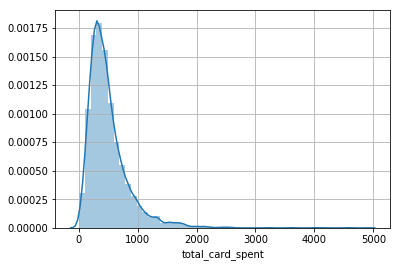

In [23]:
sb.distplot(credit_new.total_card_spent)

In [24]:
# For the data to be normally distributed, we apply log to the dependent variable - total_card_spent
credit_new["ln_total_card_spent"]= np.log(credit_new["total_card_spent"]+1)

In [25]:
credit_new=credit_new.drop(['total_card_spent'],axis=1)

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


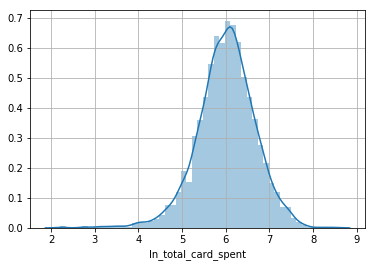

In [26]:
sb.distplot(credit_new.ln_total_card_spent)

In [94]:
corrm=credit_new.corr()

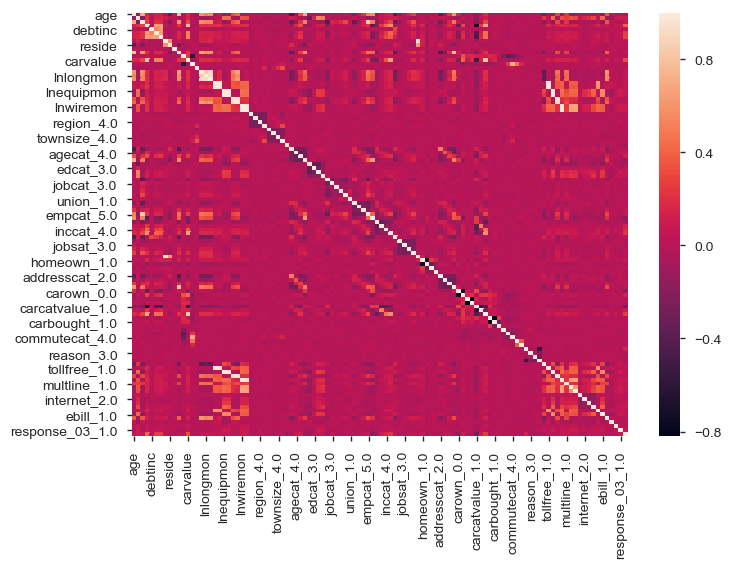

In [96]:
sb.heatmap(credit_new.corr())

### Standardize the data

In [27]:
# In order to reduce the number of variables, we apply PCA. Before that we need to standardise the model.
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

credit_new_scaled=sc.fit_transform(credit_new)
credit_new_scaled.round(2)

C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.52,  0.14, -1.  , ...,  2.59, -0.34, -1.48],
       [-1.41,  0.75, -1.  , ..., -0.39, -0.34, -2.46],
       [ 1.12, -0.17,  0.65, ..., -0.39, -0.34, -0.17],
       ...,
       [ 1.57,  0.75,  1.47, ..., -0.39, -0.34,  1.99],
       [-0.  ,  1.36, -0.69, ..., -0.39, -0.34,  0.93],
       [-0.34, -1.38,  1.06, ..., -0.39, -0.34,  0.01]])

In [28]:
pd.DataFrame(credit_new_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,...,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.984191e-16,-3.018474e-16,-1.947775e-16,-4.411582e-16,2.051692e-17,1.887379e-18,-7.170931e-17,-1.393552e-16,-7.529533e-17,8.659740e-18,...,-5.446532e-16,-2.732481e-16,-5.958567e-16,-1.345590e-17,-5.302425e-17,-1.876499e-16,-4.098277e-16,6.308065e-16,3.906875e-16,7.323989e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,...,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.633537e+00,-2.603974e+00,-1.004173e+00,-2.011634e+00,-1.555546e+00,-5.080815e+00,-4.244261e+00,-9.186408e-01,-8.638020e-01,-8.984360e-01,...,-3.497634e-01,-3.685747e-01,-3.640094e-01,-9.515712e-01,-7.315429e-01,-9.466224e-01,-3.020373e-01,-3.862138e-01,-3.381276e-01,-5.678589e+00
25%,-9.019076e-01,-7.751265e-01,-7.977742e-01,-6.986045e-01,-7.585640e-01,-6.458536e-01,-6.340658e-01,-9.186408e-01,-8.638020e-01,-8.984360e-01,...,-3.497634e-01,-3.685747e-01,-3.640094e-01,-9.515712e-01,-7.315429e-01,-9.466224e-01,-3.020373e-01,-3.862138e-01,-3.381276e-01,-5.677815e-01
50%,-1.440747e-03,-1.655107e-01,-2.817762e-01,-8.343169e-02,-1.803616e-01,4.246078e-02,3.928432e-02,-9.186408e-01,-1.463585e-01,-3.126395e-01,...,-3.497634e-01,-3.685747e-01,-3.640094e-01,-9.515712e-01,-7.315429e-01,-9.466224e-01,-3.020373e-01,-3.862138e-01,-3.381276e-01,3.648408e-02
75%,8.427469e-01,7.489131e-01,5.438206e-01,6.757498e-01,5.697388e-01,6.717549e-01,6.780958e-01,1.018657e+00,5.710851e-01,5.660551e-01,...,-3.497634e-01,-3.685747e-01,-3.640094e-01,1.050893e+00,1.366974e+00,1.056387e+00,-3.020373e-01,-3.862138e-01,-3.381276e-01,6.279340e-01
max,1.799493e+00,2.577761e+00,4.362206e+00,4.388644e+00,5.179731e+00,3.788854e+00,3.771070e+00,2.310189e+00,4.875746e+00,5.252426e+00,...,2.859075e+00,2.713154e+00,2.747182e+00,1.050893e+00,1.366974e+00,1.056387e+00,3.310849e+00,2.589239e+00,2.957463e+00,3.723989e+00


### Applying PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
pc = PCA(n_components=110)

In [31]:
pc.fit(credit_new_scaled)

#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [102]:
var

array([8.66971584e-02, 7.24635509e-02, 4.34194298e-02, 3.55840480e-02,
       2.61780894e-02, 2.33505464e-02, 2.13618033e-02, 1.81499398e-02,
       1.75435487e-02, 1.71829088e-02, 1.66723681e-02, 1.64757145e-02,
       1.57566287e-02, 1.56577806e-02, 1.51564693e-02, 1.47497317e-02,
       1.41492830e-02, 1.36034819e-02, 1.28843674e-02, 1.25159455e-02,
       1.22739532e-02, 1.20862762e-02, 1.19915868e-02, 1.19031715e-02,
       1.16925921e-02, 1.15784171e-02, 1.15105124e-02, 1.13811950e-02,
       1.12305375e-02, 1.11095974e-02, 1.10677509e-02, 1.06155359e-02,
       1.05985396e-02, 1.05260426e-02, 1.03569515e-02, 1.02928140e-02,
       1.02089795e-02, 1.00361040e-02, 1.00083235e-02, 9.84262745e-03,
       9.77213271e-03, 9.59347105e-03, 9.51954909e-03, 9.34953008e-03,
       9.30275418e-03, 9.18811528e-03, 9.12564940e-03, 8.92349628e-03,
       8.79624155e-03, 8.66701080e-03, 8.55393093e-03, 8.38522303e-03,
       8.32651316e-03, 7.85275492e-03, 7.55165883e-03, 7.36446631e-03,
      

In [103]:
var1

array([  8.67,  15.92,  20.26,  23.82,  26.44,  28.78,  30.92,  32.73,
        34.48,  36.2 ,  37.87,  39.52,  41.1 ,  42.67,  44.19,  45.66,
        47.07,  48.43,  49.72,  50.97,  52.2 ,  53.41,  54.61,  55.8 ,
        56.97,  58.13,  59.28,  60.42,  61.54,  62.65,  63.76,  64.82,
        65.88,  66.93,  67.97,  69.  ,  70.02,  71.02,  72.02,  73.  ,
        73.98,  74.94,  75.89,  76.82,  77.75,  78.67,  79.58,  80.47,
        81.35,  82.22,  83.08,  83.92,  84.75,  85.54,  86.3 ,  87.04,
        87.76,  88.43,  89.1 ,  89.73,  90.33,  90.92,  91.5 ,  92.06,
        92.6 ,  93.1 ,  93.59,  94.07,  94.52,  94.93,  95.34,  95.72,
        96.08,  96.42,  96.75,  97.05,  97.33,  97.6 ,  97.87,  98.13,
        98.38,  98.62,  98.85,  99.02,  99.18,  99.33,  99.47,  99.57,
        99.63,  99.69,  99.74,  99.78,  99.82,  99.85,  99.88,  99.9 ,
        99.92,  99.94,  99.96,  99.97,  99.98,  99.99, 100.  , 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01])

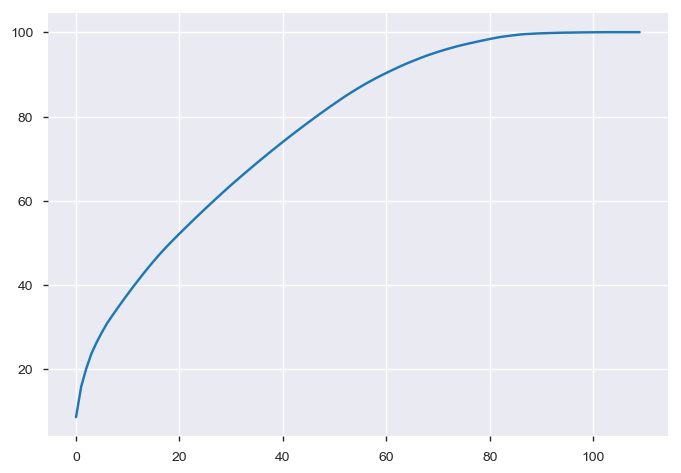

In [104]:
plt.plot(var1)

#### it shows that we must have 35 to 45 components

In [32]:
pc_final=PCA(n_components=45).fit(credit_new_scaled)

reduced_cr=pc_final.fit_transform(credit_new_scaled)

In [106]:
pd.DataFrame(reduced_cr).head(5)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-2.931347,1.964049,1.381742,-0.737235,-1.427298,0.640372,-0.920018,0.741256,2.488536,-0.153275,...,-0.450886,-1.056508,0.123430,-0.114889,0.499094,-0.155614,0.842722,0.012683,-0.548904,-1.343397
1,-1.354469,4.049619,3.008370,1.831298,0.298326,-1.086615,-0.821930,0.522704,1.781880,1.837928,...,-1.084100,-0.045006,0.324161,1.660228,-0.494879,-0.066466,-1.023008,1.681044,0.762845,0.438456
2,2.664280,-3.725409,1.032023,0.779056,2.212648,-1.104944,-0.568423,1.264315,-0.728285,2.147247,...,-0.188742,-0.124772,-0.676948,-0.803901,-0.649727,-0.268251,0.586764,-0.706169,-1.557790,-0.224588
3,-2.629796,-1.021817,0.622203,-0.291888,3.897398,-2.210995,-1.299933,0.474069,0.308197,1.173181,...,0.419013,0.390880,-0.134371,-0.593558,-0.256740,-0.430805,-1.355278,0.449770,0.591595,1.599469
4,-2.920446,1.195984,3.602164,-3.133133,0.092795,0.683072,-1.809527,0.046058,-0.642624,0.144627,...,-1.276663,0.984674,0.589075,-0.121893,-1.469039,-0.845293,-0.031618,0.087860,0.271335,-0.435709


In [33]:
col_list=credit_new.columns

In [108]:
col_list

Index(['age', 'ed', 'employ', 'lninc', 'debtinc', 'lncreddebt', 'lnothdebt',
       'spoused', 'reside', 'pets',
       ...
       'internet_2.0', 'internet_3.0', 'internet_4.0', 'callid_1.0',
       'ebill_1.0', 'news_1.0', 'response_01_1.0', 'response_02_1.0',
       'response_03_1.0', 'ln_total_card_spent'],
      dtype='object', length=110)

### Loading matrix

In [34]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=credit_new.columns).T
Loadings

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
age,0.761761,-0.277729,0.007082,0.273259,0.012534,-0.111059,0.031453,0.240832,0.014695,0.100874,...,0.023560,0.057867,-0.062078,-0.041274,0.037027,0.053011,-0.012594,-0.004085,0.017385,-0.031908
ed,-0.063742,0.518951,0.367459,0.183945,-0.099357,-0.322074,-0.252049,0.040138,-0.036494,0.022923,...,0.067322,-0.025130,-0.017421,-0.047606,0.019674,0.042972,0.015486,0.136087,0.063646,0.138730
employ,0.774389,-0.193193,-0.147593,0.270893,0.044614,0.149752,-0.096327,-0.002373,0.011118,-0.158696,...,0.060951,0.077717,-0.048334,-0.010121,-0.006240,0.024690,-0.003269,0.032528,0.035665,-0.054112
lninc,0.433935,0.710955,-0.392846,-0.021162,0.081976,-0.032317,-0.032681,0.006021,-0.000223,-0.054689,...,-0.015186,0.003235,-0.017431,-0.032804,0.044192,0.030554,0.019903,-0.051392,-0.032829,-0.070454
debtinc,0.065440,0.126863,-0.146861,0.041398,0.011416,-0.081384,-0.029041,-0.217157,-0.208463,0.486353,...,0.056114,0.029385,0.000911,0.044846,-0.008141,-0.014852,-0.006679,0.044357,0.043464,-0.003408
lncreddebt,0.287400,0.500905,-0.338600,0.018821,0.072761,-0.086188,-0.046333,-0.130825,-0.129872,0.287990,...,0.036294,-0.004764,-0.013451,-0.012148,0.008131,0.034584,0.022861,-0.007928,-0.007627,-0.045255
lnothdebt,0.335527,0.557466,-0.359020,0.015418,0.057671,-0.080476,-0.041106,-0.131838,-0.141170,0.286193,...,0.037316,0.042445,-0.023519,0.011682,0.031659,0.012933,0.008960,-0.009068,0.017755,-0.062054
spoused,0.105164,0.099748,0.238243,-0.598204,-0.048047,0.148527,-0.421319,0.279074,0.077646,-0.097124,...,0.030217,0.001256,-0.034799,-0.014760,-0.000688,0.028228,-0.021245,0.004374,0.028788,-0.007694
reside,-0.192370,0.103369,0.151418,-0.597708,-0.013755,0.224016,-0.338854,0.107555,0.055907,-0.102988,...,0.024951,-0.035897,0.019699,-0.001570,-0.017599,0.019052,0.012172,0.021837,0.001506,-0.016503
pets,0.039901,0.010133,0.036869,0.012789,-0.018821,-0.032303,-0.015908,-0.024526,-0.020817,-0.030989,...,-0.000302,0.037976,-0.166420,0.185585,0.270976,0.188087,-0.160842,-0.091394,-0.079593,0.034242


In [110]:
Loadings.to_csv("Loadings_credit.csv")

### Clustering

In [35]:
# We have applied the factor analysis to the Loadinds sheet and handpicked the required variables
list_var = ['age','ed','employ','lninc','debtinc','lncreddebt','lnothdebt','reside','address','cars','carvalue','commute',
            'commutetime','ln_total_card_spent','tenure','lnlongmon','lnlongten','lntollmon','lntollten','lnequipmon','lnequipten',
            'lncardmon','lncardten','lnwiremon','lnwireten','region_2.0','region_3.0','region_4.0','region_5.0','townsize_2.0',
            'townsize_3.0','townsize_4.0','townsize_5.0','gender_1.0','jobcat_2.0','jobcat_3.0','jobcat_4.0','jobcat_5.0',
            'jobcat_6.0','union_1.0','empcat_2.0','empcat_3.0','empcat_4.0','empcat_5.0','retire_1.0','default_1.0','jobsat_2.0',
            'jobsat_3.0','jobsat_4.0','jobsat_5.0','marital_1.0','homeown_1.0','hometype_2.0','hometype_3.0','hometype_4.0',
            'carown_0.0','carown_1.0','cartype_0.0','cartype_1.0','carcatvalue_1.0','carcatvalue_2.0','carcatvalue_3.0',
            'carbought_0.0','carbought_1.0','carbuy_1.0','telecommute_1.0','reason_2.0','reason_3.0','reason_4.0','reason_9.0',
            'churn_1.0','tollfree_1.0','equip_1.0','callcard_1.0','wireless_1.0','multline_1.0','voice_1.0','pager_1.0',
            'internet_1.0','internet_2.0','internet_3.0','internet_4.0','callid_1.0','ebill_1.0','news_1.0','response_01_1.0',
            'response_02_1.0','response_03_1.0']



In [36]:
credit_new_scaled1=pd.DataFrame(credit_new_scaled, columns=credit_new.columns)
credit_new_scaled1.head(5)



,age,ed,employ,lninc,debtinc,lncreddebt,lnothdebt,spoused,reside,pets,...,internet_2.0,internet_3.0,internet_4.0,callid_1.0,ebill_1.0,news_1.0,response_01_1.0,response_02_1.0,response_03_1.0,ln_total_card_spent
0,-1.520979,0.139297,-1.004173,-0.355988,0.179061,0.246332,0.097134,-0.918641,0.571085,-0.898436,...,-0.349763,-0.368575,-0.364009,-0.951571,-0.731543,-0.946622,-0.302037,2.589239,-0.338128,-1.482520
1,-1.408420,0.748913,-1.004173,-1.327795,1.351093,0.260023,-0.219016,-0.918641,-0.146358,0.858953,...,-0.349763,-0.368575,2.747182,1.050893,1.366974,1.056387,-0.302037,-0.386214,-0.338128,-2.455239
2,1.124143,-0.165511,0.647020,-0.193523,-0.008464,0.044310,0.207225,0.889504,0.571085,-0.019741,...,-0.349763,-0.368575,-0.364009,-0.951571,-0.731543,1.056387,-0.302037,-0.386214,-0.338128,-0.173124
3,-1.352141,0.444105,-1.004173,-0.942677,-0.664801,-2.868110,-0.519421,1.535270,2.005972,-0.898436,...,2.859075,-0.368575,-0.364009,-0.951571,1.366974,1.056387,3.310849,-0.386214,-0.338128,-0.175447
4,-1.183304,0.444105,-0.900974,-0.755579,-1.289885,-1.106416,-2.155577,0.889504,1.288529,-0.898436,...,-0.349763,2.713154,-0.364009,1.050893,-0.731543,-0.946622,-0.302037,2.589239,-0.338128,0.340579


In [118]:
credit_new_scaled2=credit_new_scaled1[list_var]
credit_new_scaled2.head(5)

,age,ed,employ,lninc,debtinc,lncreddebt,lnothdebt,reside,address,cars,...,internet_1.0,internet_2.0,internet_3.0,internet_4.0,callid_1.0,ebill_1.0,news_1.0,response_01_1.0,response_02_1.0,response_03_1.0
0,-1.520979,0.139297,-1.004173,-0.364878,0.179061,-0.019779,0.097134,0.571085,-1.323175,-0.099897,...,-0.427963,-0.349763,-0.368575,-0.364009,-0.951571,-0.731543,-0.946622,-0.302037,2.589239,-0.338128
1,-1.408420,0.748913,-1.004173,-1.318091,1.351093,-0.004171,-0.219016,-0.146358,-1.161836,-0.099897,...,-0.427963,-0.349763,-0.368575,2.747182,1.050893,1.366974,1.056387,-0.302037,-0.386214,-0.338128
2,1.124143,-0.165511,0.647020,-0.202904,-0.008464,-0.235703,0.207225,0.571085,1.096913,0.665013,...,-0.427963,-0.349763,-0.368575,-0.364009,-0.951571,-0.731543,1.056387,-0.302037,-0.386214,-0.338128
3,-1.352141,0.444105,-1.004173,-0.944129,-0.664801,-1.272702,-0.519421,2.005972,-1.081166,0.665013,...,-0.427963,2.859075,-0.368575,-0.364009,-0.951571,1.366974,1.056387,3.310849,-0.386214,-0.338128
4,-1.183304,0.444105,-0.900974,-0.760497,-1.289885,-0.991619,-2.155577,1.288529,-1.081166,-0.864808,...,-0.427963,-0.349763,2.713154,-0.364009,1.050893,-0.731543,-0.946622,-0.302037,2.589239,-0.338128


In [119]:
credit_cat.shape#categorical vars with dummies 83 cols

(5000, 83)

In [120]:
credit_new_scaled2.shape#reduced vars from 110 to 88 by PCA

(5000, 88)

In [121]:
#Splitting the data

feature_columns = credit_new_scaled2.columns.difference( ['ln_total_card_spent'] )
feature_columns

Index(['address', 'age', 'callcard_1.0', 'callid_1.0', 'carbought_0.0',
       'carbought_1.0', 'carbuy_1.0', 'carcatvalue_1.0', 'carcatvalue_2.0',
       'carcatvalue_3.0', 'carown_0.0', 'carown_1.0', 'cars', 'cartype_0.0',
       'cartype_1.0', 'carvalue', 'churn_1.0', 'commute', 'commutetime',
       'debtinc', 'default_1.0', 'ebill_1.0', 'ed', 'empcat_2.0', 'empcat_3.0',
       'empcat_4.0', 'empcat_5.0', 'employ', 'equip_1.0', 'gender_1.0',
       'homeown_1.0', 'hometype_2.0', 'hometype_3.0', 'hometype_4.0',
       'internet_1.0', 'internet_2.0', 'internet_3.0', 'internet_4.0',
       'jobcat_2.0', 'jobcat_3.0', 'jobcat_4.0', 'jobcat_5.0', 'jobcat_6.0',
       'jobsat_2.0', 'jobsat_3.0', 'jobsat_4.0', 'jobsat_5.0', 'lncardmon',
       'lncardten', 'lncreddebt', 'lnequipmon', 'lnequipten', 'lninc',
       'lnlongmon', 'lnlongten', 'lnothdebt', 'lntollmon', 'lntollten',
       'lnwiremon', 'lnwireten', 'marital_1.0', 'multline_1.0', 'news_1.0',
       'pager_1.0', 'reason_2.0', 're

In [122]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_new_scaled2[feature_columns],
                                                  credit_new_scaled2['ln_total_card_spent'],
                                                  test_size = 0.3,
                                                  random_state = 1234 )

In [123]:
print(len( train_X ))
print(len( test_X))

3500
1500


### Using statsmodel

In [124]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(credit_new_scaled2,test_size=0.3,random_state = 123 ) 

In [125]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['age', 'ed', 'employ', 'lninc', 'debtinc', 'lncreddebt', 'lnothdebt',
       'reside', 'address', 'cars', 'carvalue', 'commute', 'commutetime',
       'ln_total_card_spent', 'tenure', 'lnlongmon', 'lnlongten', 'lntollmon',
       'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon', 'lncardten',
       'lnwiremon', 'lnwireten', 'region_2.0', 'region_3.0', 'region_4.0',
       'region_5.0', 'townsize_2.0', 'townsize_3.0', 'townsize_4.0',
       'townsize_5.0', 'gender_1.0', 'jobcat_2.0', 'jobcat_3.0', 'jobcat_4.0',
       'jobcat_5.0', 'jobcat_6.0', 'union_1.0', 'empcat_2.0', 'empcat_3.0',
       'empcat_4.0', 'empcat_5.0', 'retire_1.0', 'default_1.0', 'jobsat_2.0',
       'jobsat_3.0', 'jobsat_4.0', 'jobsat_5.0', 'marital_1.0', 'homeown_1.0',
       'hometype_2.0', 'hometype_3.0', 'hometype_4.0', 'carown_0.0',
       'carown_1.0', 'cartype_0.0', 'cartype_1.0', 'carcatvalue_1.0',
       'carcatvalue_2.0', 'carcatvalue_3.0', 'carbought_0.0', 'carbought_1.0',
       'carbuy_1.0', '

In [126]:
import statsmodels.api as sm

In [127]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [128]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ln_total_card_spent   R-squared:                       0.223
Model:                             OLS   Adj. R-squared:                  0.204
Method:                  Least Squares   F-statistic:                     11.66
Date:                 Fri, 11 Jan 2019   Prob (F-statistic):          3.57e-131
Time:                         14:33:27   Log-Likelihood:                -4577.0
No. Observations:                 3500   AIC:                             9324.
Df Residuals:                     3415   BIC:                             9848.
Df Model:                           84                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0054      0.015      0.350      0.727      -0.025       0.036
address             0.0092      0.030      0.311      0.756      -0.049       0.067
age                -0.1038      0.042     -2.494      0.013      -0.185      -0.022
callcard_1.0        0.0428      0.068      0.630      0.528      -0.090       0.176
callid_1.0          0.0104      0.022      0.480      0.631      -0.032       0.053
carbought_0.0       0.0171      0.013      1.306      0.192      -0.009       0.043
carbought_1.0      -0.0110      0.014     -0.776      0.438      -0.039       0.017
carbuy_1.0          0.0156      0.016      0.968      0.333      -0.016       0.047
carcatvalue_1.0    -0.0042      0.017     -0.250      0.803      -0.037       0.029
carcatvalue_2.0    -0.0100      0.013     -0.767      0.443      -0.036       0.016
carcatvalue_3.0     0.0262      0.030      0.877      0.381      -0.032       0.085
carown_0.0         -0.0019      0.016     -0.116      0.907      -0.033       0.029
carown_1.0          0.0092      0.015      0.601      0.548      -0.021       0.039
cars               -0.0052      0.021     -0.244      0.807      -0.047       0.037
cartype_0.0         0.0015      0.013      0.115      0.909      -0.024       0.027
cartype_1.0         0.0052      0.013      0.396      0.692      -0.021       0.031
carvalue           -0.0936      0.049     -1.928      0.054      -0.189       0.002
churn_1.0           0.0150      0.018      0.828      0.407      -0.020       0.050
commute            -0.0179      0.020     -0.908      0.364      -0.057       0.021
commutetime         0.0279      0.018      1.575      0.115      -0.007       0.063
debtinc            -0.0196      0.036     -0.543      0.587      -0.090       0.051
default_1.0         0.0168      0.019      0.893      0.372      -0.020       0.054
ebill_1.0          -0.0074      0.021     -0.357      0.721      -0.048       0.033
ed                 -0.0070      0.021     -0.341      0.733      -0.047       0.033
empcat_2.0          0.0149      0.024      0.617      0.537      -0.032       0.062
empcat_3.0          0.0025      0.029      0.087      0.931      -0.055       0.060
empcat_4.0          0.0057      0.032      0.177      0.859      -0.057       0.068
empcat_5.0          0.0004      0.053      0.008      0.993      -0.104       0.105
employ              0.0509      0.049      1.045      0.296      -0.045       0.146
equip_1.0          -0.0764      0.222     -0.344      0.731      -0.512       0.359
gender_1.0         -0.0846      0.015     -5.464      0.000      -0.115      -0.054
homeown_1.0         0.0221      0.023      0.964      0.335      -0.023       0.067
hometype_2.0        0.0216      0.023      0.936      0.349      -0.024       0.067
hometype_3.0        0.0129      0.017      0.774

In [129]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

Parameters:  const              0.005373
address            0.009238
age               -0.103847
callcard_1.0       0.042829
callid_1.0         0.010388
carbought_0.0      0.017110
carbought_1.0     -0.010958
carbuy_1.0         0.015620
carcatvalue_1.0   -0.004234
carcatvalue_2.0   -0.009997
carcatvalue_3.0    0.026235
carown_0.0        -0.001857
carown_1.0         0.009154
cars              -0.005201
cartype_0.0        0.001483
cartype_1.0        0.005217
carvalue          -0.093596
churn_1.0          0.014987
commute           -0.017915
commutetime        0.027858
debtinc           -0.019555
default_1.0        0.016771
ebill_1.0         -0.007405
ed                -0.007006
empcat_2.0         0.014858
empcat_3.0         0.002530
empcat_4.0         0.005672
empcat_5.0         0.000446
employ             0.050896
equip_1.0         -0.076421
                     ...   
lntollten         -0.102895
lnwiremon         -0.380911
lnwireten          0.177079
marital_1.0        0.008259
multlin

In [130]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print( 'MSE:', metrics.mean_squared_error(test_y, y_pred))
print( 'RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
print( 'R-squre:', metrics.r2_score(test_y, y_pred))

MAE: 0.6956944637736412
MSE: 0.7761407183140017
RMSE: 0.8809884893198104
R-squre: 0.16517260562229863


#### The model is not good on the data. The error is high and R2 is low. It gives different R2 values on training and test data

In [131]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(credit_new_scaled2,test_size=0.3,random_state = 123 ) 

In [132]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['age', 'ed', 'employ', 'lninc', 'debtinc', 'lncreddebt', 'lnothdebt',
       'reside', 'address', 'cars', 'carvalue', 'commute', 'commutetime',
       'ln_total_card_spent', 'tenure', 'lnlongmon', 'lnlongten', 'lntollmon',
       'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon', 'lncardten',
       'lnwiremon', 'lnwireten', 'region_2.0', 'region_3.0', 'region_4.0',
       'region_5.0', 'townsize_2.0', 'townsize_3.0', 'townsize_4.0',
       'townsize_5.0', 'gender_1.0', 'jobcat_2.0', 'jobcat_3.0', 'jobcat_4.0',
       'jobcat_5.0', 'jobcat_6.0', 'union_1.0', 'empcat_2.0', 'empcat_3.0',
       'empcat_4.0', 'empcat_5.0', 'retire_1.0', 'default_1.0', 'jobsat_2.0',
       'jobsat_3.0', 'jobsat_4.0', 'jobsat_5.0', 'marital_1.0', 'homeown_1.0',
       'hometype_2.0', 'hometype_3.0', 'hometype_4.0', 'carown_0.0',
       'carown_1.0', 'cartype_0.0', 'cartype_1.0', 'carcatvalue_1.0',
       'carcatvalue_2.0', 'carcatvalue_3.0', 'carbought_0.0', 'carbought_1.0',
       'carbuy_1.0', '

In [217]:
import statsmodels.formula.api as smf

lm=smf.ols('ln_total_card_spent~age+lncreddebt+lninc+tenure+carvalue+commutetime+employ', train).fit()#for 90% confidence <=0.1

In [218]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ln_total_card_spent   R-squared:                       0.177
Model:                             OLS   Adj. R-squared:                  0.175
Method:                  Least Squares   F-statistic:                     107.1
Date:                 Fri, 11 Jan 2019   Prob (F-statistic):          1.73e-142
Time:                         21:07:42   Log-Likelihood:                -4690.5
No. Observations:                 3500   AIC:                             9397.
Df Residuals:                     3492   BIC:                             9446.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0136      0.016     -0.867      0.386      -0.044       0.017
age            -0.0557      0.023     -2.370      0.018      -0.102      -0.010
lncreddebt      0.0299      0.020      1.467      0.143      -0.010       0.070
lninc           0.4435      0.029     15.127      0.000       0.386       0.501
tenure          0.0094      0.021      0.457      0.648      -0.031       0.050
carvalue       -0.0342      0.027     -1.272      0.204      -0.087       0.019
commutetime     0.0093      0.016      0.599      0.549      -0.021       0.040
employ         -0.0172      0.024     -0.732      0.464      -0.063       0.029
==============================================================================
Omnibus:                      299.574   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              581.574
Skew:                          -0.577   Prob(JB):                    5.16e-127
Kurtosis:                       4.630   Cond. No.                         4.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
test.columns= [phrase.strip().replace('-', '') for phrase in test.columns]
test.columns

Index(['age', 'ed', 'employ', 'lninc', 'debtinc', 'lncreddebt', 'lnothdebt',
       'reside', 'address', 'cars', 'carvalue', 'commute', 'commutetime',
       'ln_total_card_spent', 'tenure', 'lnlongmon', 'lnlongten', 'lntollmon',
       'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon', 'lncardten',
       'lnwiremon', 'lnwireten', 'region_2.0', 'region_3.0', 'region_4.0',
       'region_5.0', 'townsize_2.0', 'townsize_3.0', 'townsize_4.0',
       'townsize_5.0', 'gender_1.0', 'jobcat_2.0', 'jobcat_3.0', 'jobcat_4.0',
       'jobcat_5.0', 'jobcat_6.0', 'union_1.0', 'empcat_2.0', 'empcat_3.0',
       'empcat_4.0', 'empcat_5.0', 'retire_1.0', 'default_1.0', 'jobsat_2.0',
       'jobsat_3.0', 'jobsat_4.0', 'jobsat_5.0', 'marital_1.0', 'homeown_1.0',
       'hometype_2.0', 'hometype_3.0', 'hometype_4.0', 'carown_0.0',
       'carown_1.0', 'cartype_0.0', 'cartype_1.0', 'carcatvalue_1.0',
       'carcatvalue_2.0', 'carcatvalue_3.0', 'carbought_0.0', 'carbought_1.0',
       'carbuy_1.0', '

In [161]:
pred = lm.predict(test)
pred.head(5)

2648   -0.364823
2456    0.349217
4557   -0.794886
4884   -0.434401
92      0.340689
dtype: float64

In [162]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(test.ln_total_card_spent, pred))
print( 'MSE:', metrics.mean_squared_error(test.ln_total_card_spent, pred))
print( 'RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_total_card_spent, pred)))
print( 'R-Squre:', metrics.r2_score(test.ln_total_card_spent, pred))

MAE: 0.6807734562687955
MSE: 0.7886501712977682
RMSE: 0.8880597791240002
R-Squre: 0.13295779870072544


#### Even if we removed all the insignificant variables and run the model,it does not improve.Hence the model failed on the data

In [165]:
pred = lm.predict(train)
pred_spent = np.exp(pred)-1
pred.head(5)

4036   -0.189816
2883   -0.012730
4162    0.053760
4640    0.096337
2430    0.010318
dtype: float64

In [166]:
pred_spent.head(5)

4036   -0.172889
2883   -0.012649
4162    0.055232
4640    0.101130
2430    0.010372
dtype: float64

In [168]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print( 'MAE:', metrics.mean_absolute_error(train.ln_total_card_spent, pred))
print( 'MSE:', metrics.mean_squared_error(train.ln_total_card_spent, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_total_card_spent, pred)))
print ('R-Squre:', metrics.r2_score(train.ln_total_card_spent, pred))
print( 'R-Squre:', metrics.r2_score(train.ln_total_card_spent, pred_spent))

MAE: 0.7125030246373891
MSE: 0.8548709365925876
RMSE: 0.9245923083135548
R-Squre: 0.17609130343320456
R-Squre: 0.13360540112345887


In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [176]:
%%capture
#gather features
# get y and X dataframes based on this regression
y, X = dmatrices('ln_total_card_spent~age+lninc+lncreddebt+carvalue+commutetime+employ+tenure', train, return_type='dataframe')

In [177]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [178]:
vif.round(1)

,VIF Factor,features
0,1.0,Intercept
1,2.3,age
2,3.5,lninc
3,1.7,lncreddebt
4,3.0,carvalue
5,1.0,commutetime
6,2.2,employ
7,1.7,tenure


In [181]:
lm1=smf.ols('ln_total_card_spent~lninc+lncreddebt+tenure', train).fit()

In [182]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ln_total_card_spent   R-squared:                       0.173
Model:                             OLS   Adj. R-squared:                  0.173
Method:                  Least Squares   F-statistic:                     244.4
Date:                 Fri, 11 Jan 2019   Prob (F-statistic):          6.05e-144
Time:                         19:48:28   Log-Likelihood:                -4697.7
No. Observations:                 3500   AIC:                             9403.
Df Residuals:                     3496   BIC:                             9428.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0140      0.016     -0.896      0.370      -0.045       0.017
lninc          0.4153      0.020     20.385      0.000       0.375       0.455
lncreddebt     0.0247      0.020      1.214      0.225      -0.015       0.065
tenure        -0.0353      0.016     -2.208      0.027      -0.067      -0.004
==============================================================================
Omnibus:                      310.825   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              616.430
Skew:                          -0.588   Prob(JB):                    1.39e-134
Kurtosis:                       4.686   Cond. No.                         2.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
train['y_pred_train'] = lm1.predict(train)

In [184]:
train.head(2)

,age,ed,employ,lninc,debtinc,lncreddebt,lnothdebt,reside,address,cars,...,internet_2.0,internet_3.0,internet_4.0,callid_1.0,ebill_1.0,news_1.0,response_01_1.0,response_02_1.0,response_03_1.0,y_pred_train
4036,1.686935,0.748913,2.917412,-0.202904,1.569873,0.587554,0.774203,-0.146358,2.548966,-0.099897,...,-0.349763,-0.368575,-0.364009,1.050893,-0.731543,1.056387,-0.302037,-0.386214,-0.338128,-0.136395
2883,1.630655,0.444105,0.131022,0.221071,-0.195989,0.502659,0.059296,-0.146358,1.580930,-0.099897,...,-0.349763,-0.368575,-0.364009,-0.951571,1.366974,1.056387,-0.302037,-0.386214,-0.338128,0.071827


In [185]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(train.ln_total_card_spent, train.y_pred_train))
print ('MSE:', metrics.mean_squared_error(train.ln_total_card_spent, train.y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_total_card_spent, train.y_pred_train)))

MAE: 0.7129569785928712
MSE: 0.8577262492829775
RMSE: 0.9261351139455719


In [186]:
test['y_pred_test'] = lm1.predict(test)

In [187]:
test.head(2)

,age,ed,employ,lninc,debtinc,lncreddebt,lnothdebt,reside,address,cars,...,internet_2.0,internet_3.0,internet_4.0,callid_1.0,ebill_1.0,news_1.0,response_01_1.0,response_02_1.0,response_03_1.0,y_pred_test
2648,-1.408420,0.748913,-1.004173,-1.011225,-0.461649,-0.790409,-0.657268,-0.863802,-1.242505,-0.099897,...,-0.349763,-0.368575,2.747182,-0.951571,1.366974,1.056387,-0.302037,-0.386214,-0.338128,-0.397173
2456,-0.282837,-0.775127,0.337421,0.824662,-0.383514,0.095193,0.667552,-0.863802,-0.113131,0.665013,...,-0.349763,-0.368575,-0.364009,1.050893,-0.731543,-0.946622,-0.302037,-0.386214,-0.338128,0.387146


In [188]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(test.ln_total_card_spent, test.y_pred_test))
print( 'MSE:', metrics.mean_squared_error(test.ln_total_card_spent, test.y_pred_test))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_total_card_spent, test.y_pred_test)))

MAE: 0.6823825031719021
MSE: 0.7906087805959555
RMSE: 0.8891618416216226


In [189]:
train['y_pred_train'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0   -0.910521
0.1   -0.539243
0.2   -0.377618
0.3   -0.262914
0.4   -0.152728
0.5   -0.049718
0.6    0.062410
0.7    0.188435
0.8    0.331431
0.9    0.541871
1.0    1.907035
Name: y_pred_train, dtype: float64

In [190]:
train['Deciles']=pd.qcut(train['y_pred_train'],10, labels=False)
test['Deciles']=pd.qcut(test['y_pred_test'],10, labels=False)

In [191]:
train.head(2)

,age,ed,employ,lninc,debtinc,lncreddebt,lnothdebt,reside,address,cars,...,internet_3.0,internet_4.0,callid_1.0,ebill_1.0,news_1.0,response_01_1.0,response_02_1.0,response_03_1.0,y_pred_train,Deciles
4036,1.686935,0.748913,2.917412,-0.202904,1.569873,0.587554,0.774203,-0.146358,2.548966,-0.099897,...,-0.368575,-0.364009,1.050893,-0.731543,1.056387,-0.302037,-0.386214,-0.338128,-0.136395,4
2883,1.630655,0.444105,0.131022,0.221071,-0.195989,0.502659,0.059296,-0.146358,1.580930,-0.099897,...,-0.368575,-0.364009,-0.951571,1.366974,1.056387,-0.302037,-0.386214,-0.338128,0.071827,6


In [192]:
test.head(2)

,age,ed,employ,lninc,debtinc,lncreddebt,lnothdebt,reside,address,cars,...,internet_3.0,internet_4.0,callid_1.0,ebill_1.0,news_1.0,response_01_1.0,response_02_1.0,response_03_1.0,y_pred_test,Deciles
2648,-1.408420,0.748913,-1.004173,-1.011225,-0.461649,-0.790409,-0.657268,-0.863802,-1.242505,-0.099897,...,-0.368575,2.747182,-0.951571,1.366974,1.056387,-0.302037,-0.386214,-0.338128,-0.397173,1
2456,-0.282837,-0.775127,0.337421,0.824662,-0.383514,0.095193,0.667552,-0.863802,-0.113131,0.665013,...,-0.368575,-0.364009,1.050893,-0.731543,-0.946622,-0.302037,-0.386214,-0.338128,0.387146,8


In [193]:
# Doing the deciling for the training data, but the rank ordering is broken.After 5th decile the value seems to be increased.

train[['Deciles','ln_total_card_spent', 'y_pred_train']].groupby(train.Deciles).mean()

,Deciles,ln_total_card_spent,y_pred_train
Deciles,,,
0,0,-0.800144,-0.707753
1,1,-0.397699,-0.453185
2,2,-0.246585,-0.318367
3,3,-0.162811,-0.201763
4,4,-0.112033,-0.106093
5,5,0.014174,0.006793
6,6,0.032315,0.125148
7,7,0.317835,0.259512
8,8,0.481023,0.428389


In [194]:
# Doing the deciling for the testing data, but the rank ordering is broken.After 5th decile the value seems to be increased.

test[['Deciles','ln_total_card_spent', 'y_pred_test']].groupby(test.Deciles).mean()

,Deciles,ln_total_card_spent,y_pred_test
Deciles,,,
0,0,-0.546822,-0.693218
1,1,-0.424041,-0.442360
2,2,-0.155994,-0.311098
3,3,-0.160991,-0.192747
4,4,0.027258,-0.089279
5,5,0.050981,0.023345
6,6,0.242129,0.145957
7,7,0.308374,0.281293
8,8,0.474559,0.447146


C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


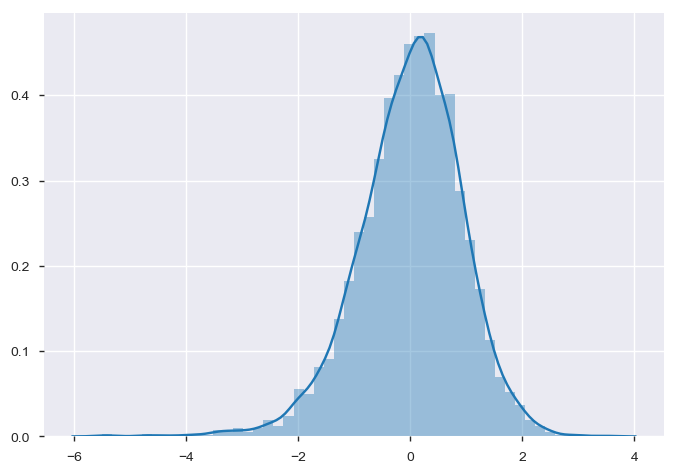

In [195]:
sb.distplot(lm1.resid)

### Using Sklearn library to build the model

In [197]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [198]:
linreg.coef_

array([ 1.03121150e+08,  9.97061286e-03, -1.04534155e-01,  4.32529671e-02,
        1.06096335e-02, -4.93418514e+11, -4.66528630e+11,  1.62844587e-02,
        6.20998206e+11,  5.40657644e+11,  4.64056628e+11, -2.06696401e+11,
       -2.47184466e+11, -5.63311577e-03,  1.59850196e+11,  1.59394998e+11,
       -9.31243896e-02,  1.47552490e-02, -1.80988312e-02,  2.75154114e-02,
       -1.91040039e-02,  1.68457031e-02, -7.56835938e-03, -6.69860840e-03,
        1.50756836e-02,  3.05175781e-03,  6.22558594e-03,  1.44195557e-03,
        5.04760742e-02, -7.65075684e-02, -8.44726562e-02,  2.18887329e-02,
        2.13851929e-02,  1.30615234e-02,  1.64394379e-02, -7.51495361e-03,
        2.84614563e-02,  4.64515686e-02,  4.67605591e-02, -6.67572021e-04,
       -7.62939453e-03, -3.75976562e-02, -2.84271240e-02, -3.60031128e-02,
        1.26037598e-02,  9.30786133e-04,  1.35345459e-02, -1.14746094e-02,
        2.24456787e-02, -1.10298157e-01,  1.49116516e-02,  6.64672852e-02,
       -2.41088867e-03,  

In [199]:
linreg.score(train_X, train_y)

0.22285820957872615

In [200]:
y_pred_t = linreg.predict(train_X)
y_pred_t

array([ 0.47057271,  0.55530614,  0.7496964 , ...,  0.02784987,
       -0.05813393,  0.83998336])

In [201]:
pd.concat([train_y, pred],axis=1).corr()

,ln_total_card_spent,0
ln_total_card_spent,1.000000,0.430386
0,0.430386,1.000000


In [202]:
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print (rmse_t)
print (metrics.r2_score( train_y, y_pred_t ))

0.8947303311803614
0.22285820957872615


In [203]:
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print (rmse)
print (metrics.r2_score( test_y, y_pred ))

0.8810343551477862
0.16508567816104736


In [204]:
residuals = train_y - y_pred_t

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


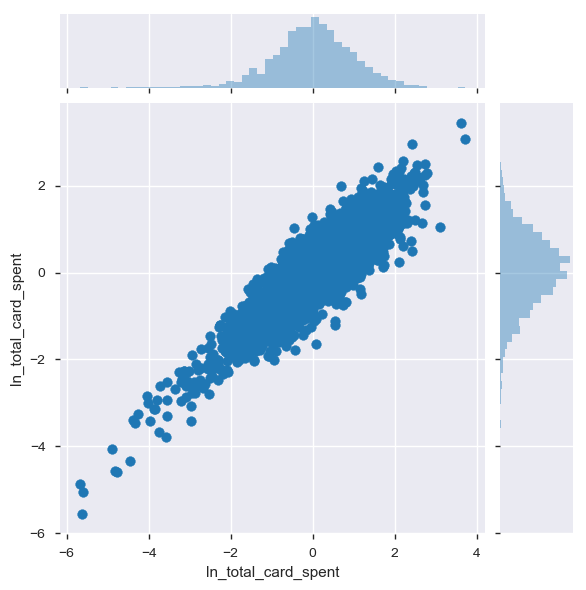

In [205]:
sb.jointplot(  train_y, residuals )

C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


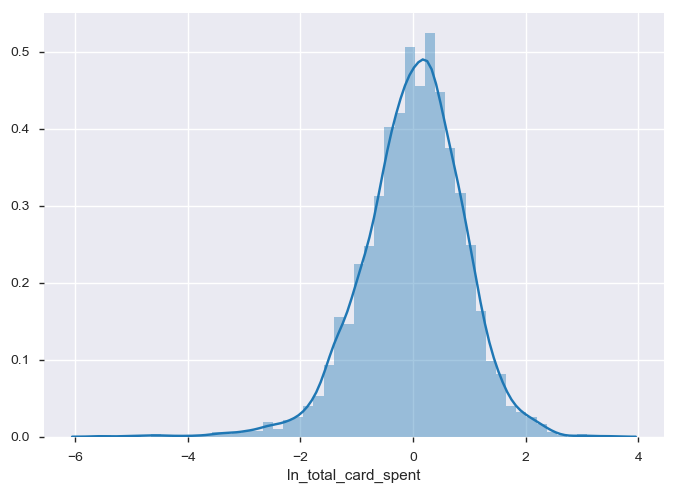

In [206]:
sb.distplot( residuals )

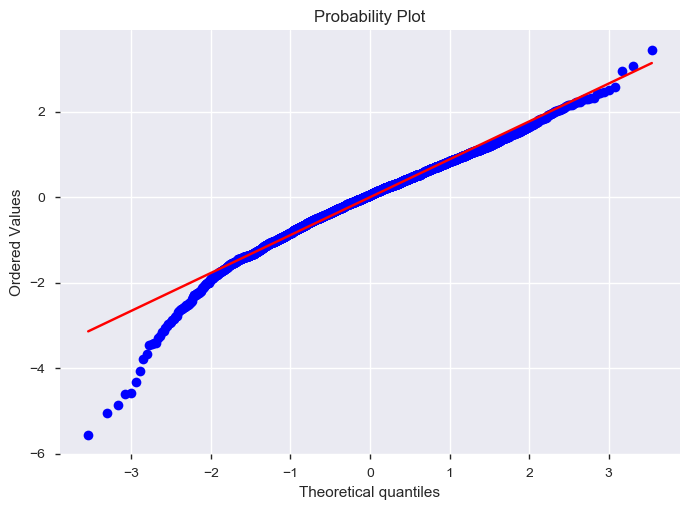

In [207]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

#### The Q-Q plot indicates the high error rate in the model ie; the model is not good and there is high deviation from the path.

In [208]:
### K-FOLD CROSS VALIDATION
from sklearn.cross_validation import cross_val_score

In [209]:
linreg = LinearRegression()

In [211]:
cross_val_score( linreg, train_X, train_y, scoring = 'r2', cv = 5 )

array([0.13140803, 0.18053947, 0.15812927, 0.22203254, 0.18753221])

In [212]:
round( np.mean( cross_val_score( linreg,
                              train_X,
                              train_y,
                              scoring = 'r2',
                              cv = 5 ) ), 2 )

0.18

In [213]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [214]:
F_values, p_values  = f_regression(  train_X, train_y )

C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\Sony\Anaconda4\lib\site-packages\sklearn\feature_selection\univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Sony\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [215]:
F_values

array([           nan, 1.04581576e+01, 1.75916384e-01, 1.78577577e+00,
       1.10696500e+01, 6.16561606e-02, 1.23030972e-01, 9.62628761e-01,
       3.19617523e+02, 2.46219407e+01, 2.86360720e+02, 9.28263265e+01,
       5.52506360e+01, 3.71241905e-01, 1.21672501e+00, 2.80050029e-01,
       3.96546370e+02, 6.67899787e-01, 6.39421465e-01, 6.39225275e-01,
       4.06814382e-01, 2.69988421e+00, 2.97829754e+00, 2.83321995e+01,
       1.32470256e+00, 1.33846139e-01, 5.43836047e+00, 1.62212904e+01,
       2.31277601e+01, 5.77377086e+00, 2.77453592e+01, 1.99734559e+01,
       1.27968272e+01, 1.53482673e+00, 9.21430431e-02, 6.86018551e-01,
       2.02759215e-01, 6.20268997e+00, 7.10161563e+00, 2.47952828e+01,
       5.30251643e+00, 1.61266559e+00, 4.37776919e-01, 1.52902894e-01,
       3.26873795e-02, 1.36191123e-01, 3.44067626e+00, 7.32305867e+00,
       2.10672588e+00, 4.95649576e+00, 2.65224103e+02, 7.41580904e+00,
       9.35347786e+00, 7.32379926e+02, 1.16288059e+01, 1.80582300e+01,
      

In [216]:
['%.3f' % p for p in p_values]

['nan',
 '0.001',
 '0.675',
 '0.182',
 '0.001',
 '0.804',
 '0.726',
 '0.327',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.542',
 '0.270',
 '0.597',
 '0.000',
 '0.414',
 '0.424',
 '0.424',
 '0.524',
 '0.100',
 '0.084',
 '0.000',
 '0.250',
 '0.714',
 '0.020',
 '0.000',
 '0.000',
 '0.016',
 '0.000',
 '0.000',
 '0.000',
 '0.215',
 '0.761',
 '0.408',
 '0.653',
 '0.013',
 '0.008',
 '0.000',
 '0.021',
 '0.204',
 '0.508',
 '0.696',
 '0.857',
 '0.712',
 '0.064',
 '0.007',
 '0.147',
 '0.026',
 '0.000',
 '0.006',
 '0.002',
 '0.000',
 '0.001',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.147',
 '0.006',
 '0.013',
 '0.000',
 '0.000',
 '0.130',
 '0.012',
 '0.255',
 '0.641',
 '0.796',
 '0.343',
 '0.078',
 '0.601',
 '0.273',
 '0.209',
 '0.000',
 '0.000',
 '0.813',
 '0.000',
 '0.001',
 '0.547',
 '0.533',
 '0.935',
 '0.192',
 '0.179',
 '0.014',
 '0.000']

### Hence we can conclude that evenafter applying the techniques like data screening,data preparation,log transformation,Exploratory analysis,variable reduction(PCA),the model seems to be doesnt perform well.This maybe due to the high correlation of data due to high number of variables or Non-linearity of the data.